In [1]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
files = glob(f'predictors*.xlsx')
df = pd.concat(pd.read_excel(excel_file) for excel_file in files)

In [3]:
y_lim = (0.65, 1.01)

In [4]:
top_models = df.groupby('model')['roc_auc'].mean().sort_values(ascending=False).head(10).index

In [5]:
df_top = df[df['model'].isin(top_models)]

In [6]:
x_order = df_top.groupby('model')['roc_auc'].agg('median').sort_values(ascending=False).index

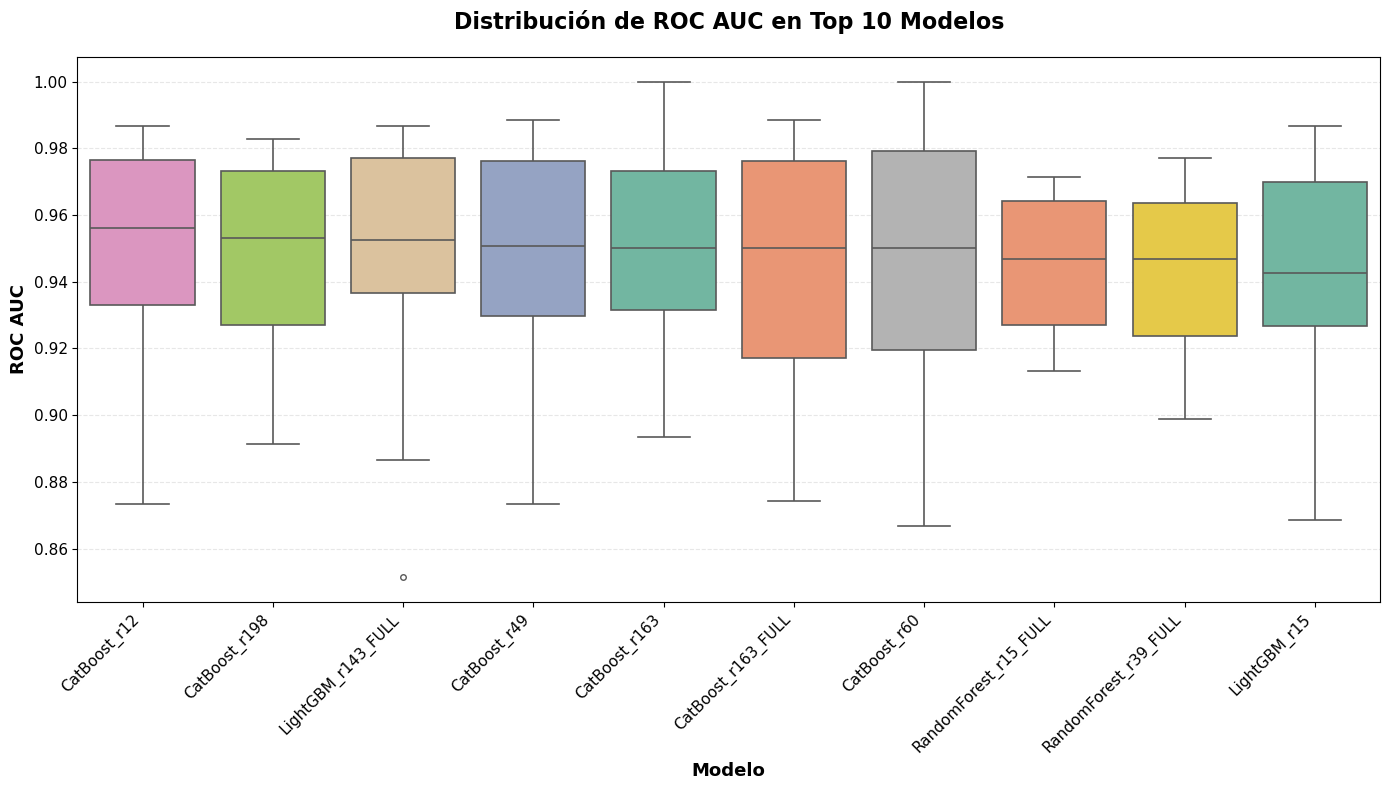

In [7]:
# === 2. DISTRIBUCIÓN DE ROC AUC (BOXPLOT) ===
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top, x='model', y='roc_auc', order=x_order, hue='model',
           palette='Set2', linewidth=1.2, fliersize=4)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('Modelo', fontsize=13, fontweight='bold')
plt.ylabel('ROC AUC', fontsize=13, fontweight='bold')
plt.title('Distribución de ROC AUC en Top 10 Modelos',
         fontsize=16, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

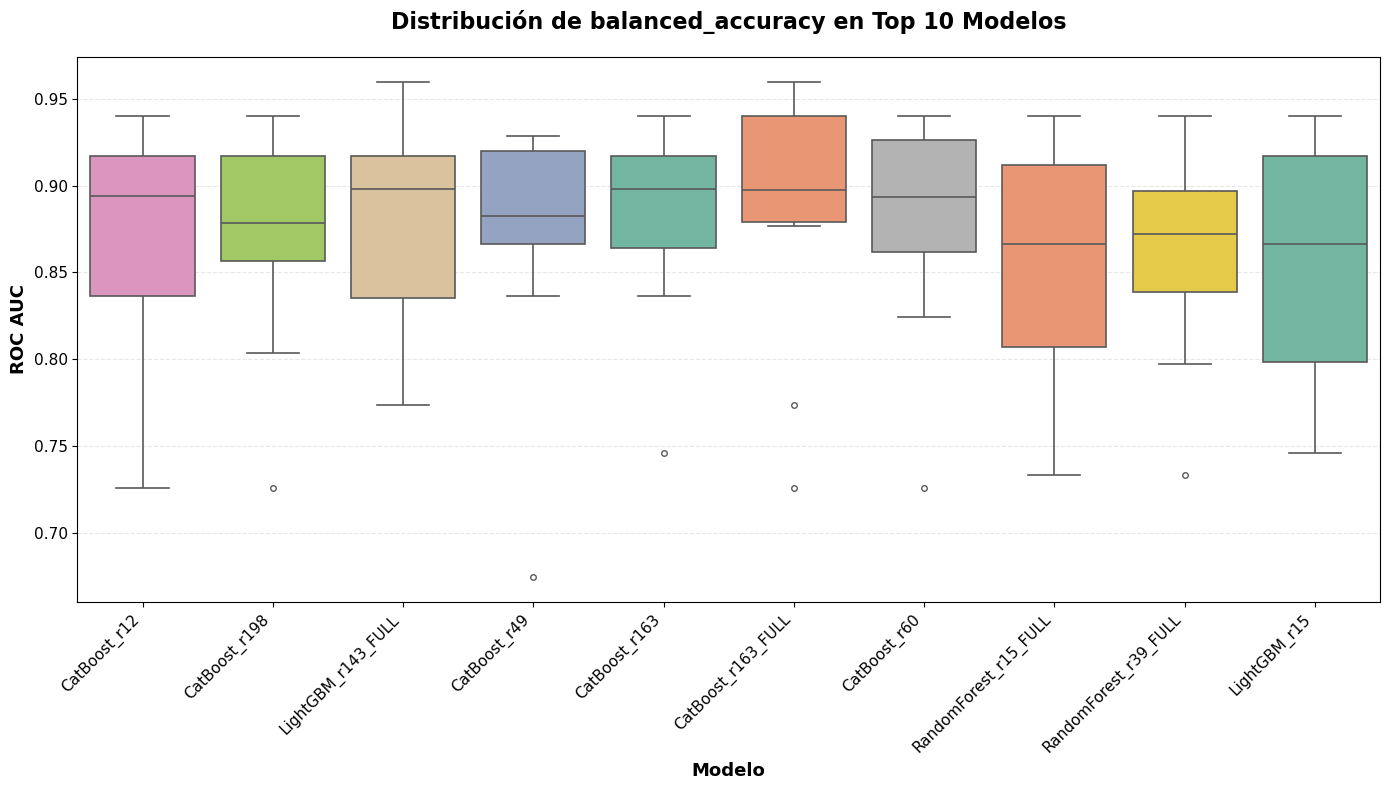

In [8]:
# === 2. DISTRIBUCIÓN DE ROC AUC (BOXPLOT) ===
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top, x='model', y='balanced_accuracy', order=x_order, hue='model',
           palette='Set2', linewidth=1.2, fliersize=4)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('Modelo', fontsize=13, fontweight='bold')
plt.ylabel('ROC AUC', fontsize=13, fontweight='bold')
plt.title('Distribución de balanced_accuracy en Top 10 Modelos',
         fontsize=16, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

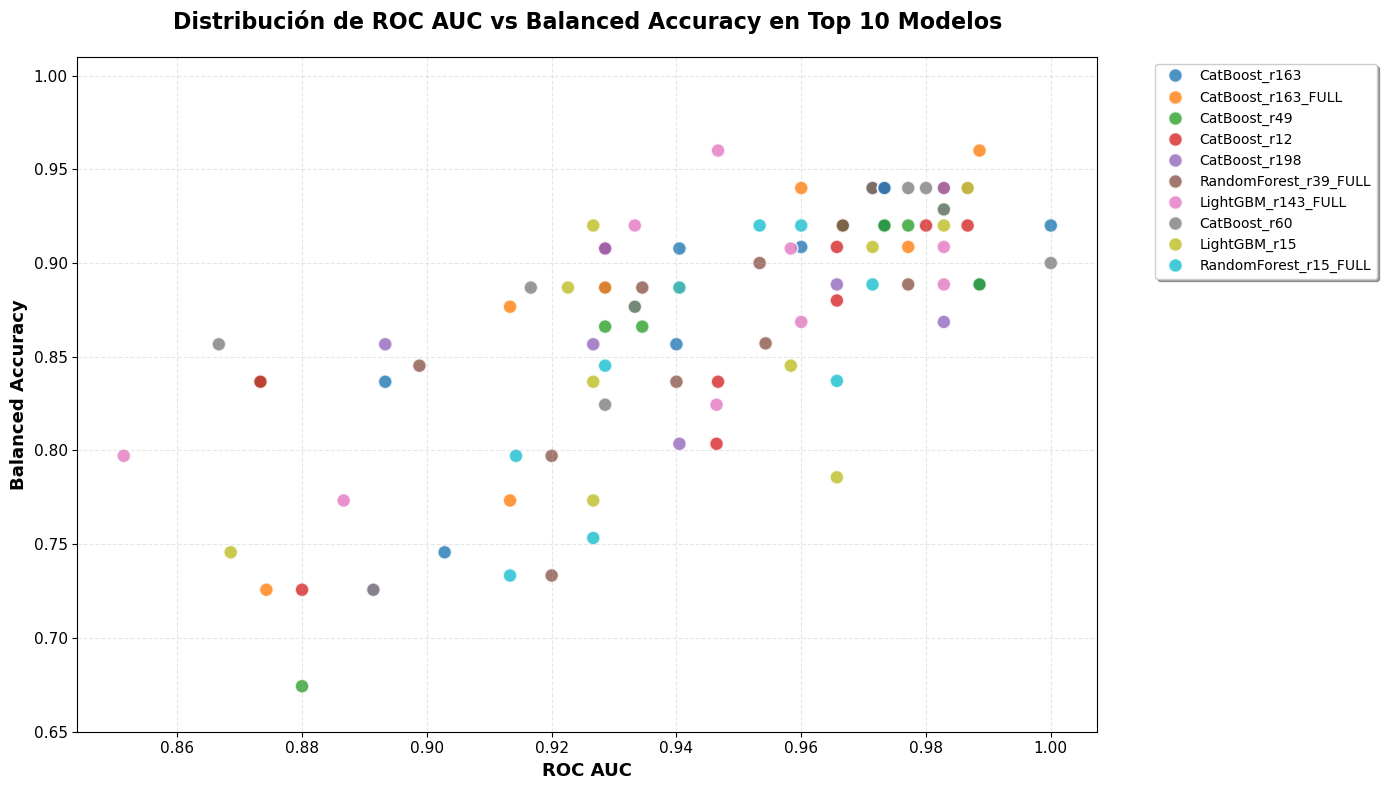

In [9]:
# === 4. BALANCED ACCURACY VS TIEMPO DE PREDICCIÓN ===
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_top, x='roc_auc', y='balanced_accuracy', hue='model',
                s=100, alpha=0.8, edgecolors='white', linewidth=1.2)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('ROC AUC', fontsize=13, fontweight='bold')
plt.ylabel('Balanced Accuracy', fontsize=13, fontweight='bold')
plt.title('Distribución de ROC AUC vs Balanced Accuracy en Top 10 Modelos',
         fontsize=16, fontweight='bold', pad=20)
plt.grid(axis='both', alpha=0.3, linestyle='--', linewidth=0.8)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, 
          frameon=True, fancybox=True, shadow=True)
plt.ylim(0.65, 1.01)
plt.tight_layout()
plt.show()

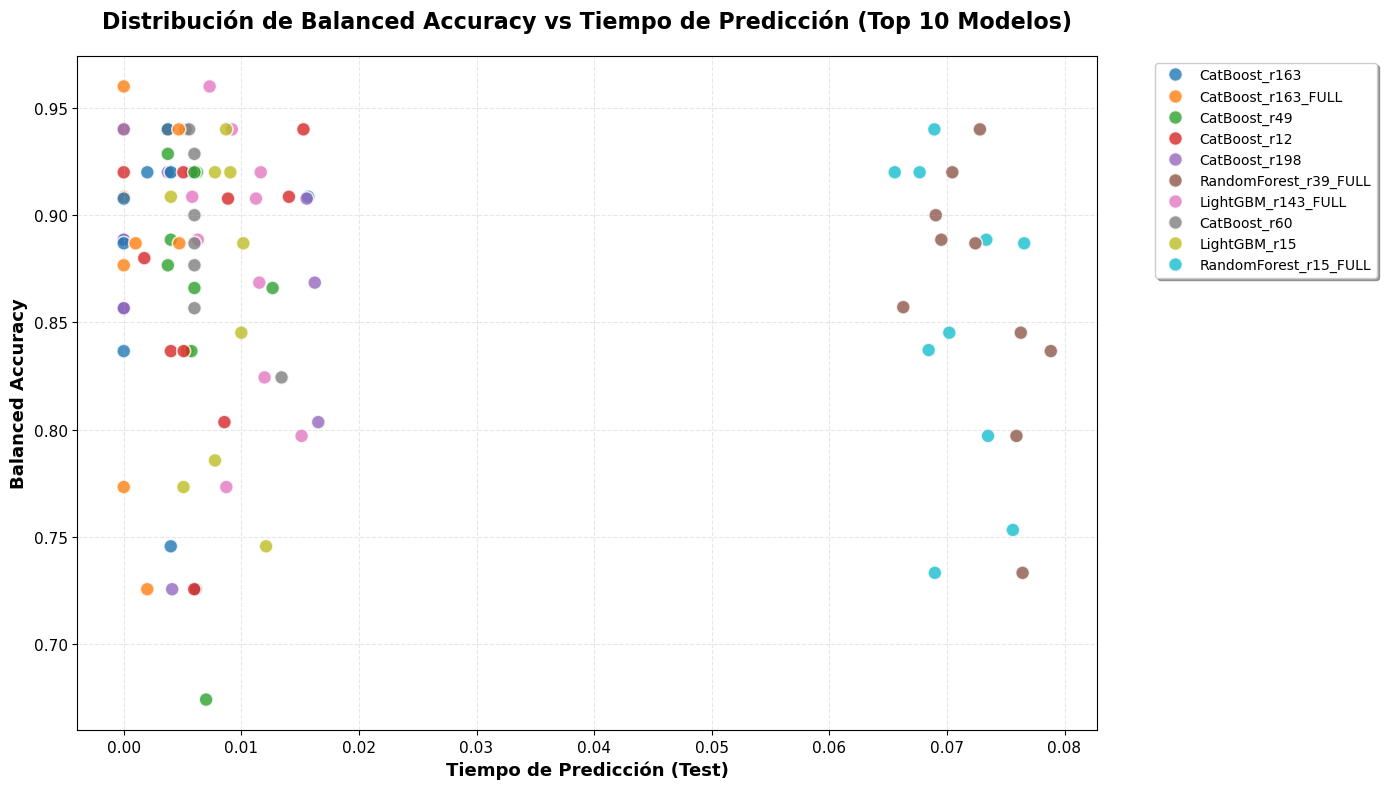

In [10]:
# === 4. BALANCED ACCURACY VS TIEMPO DE PREDICCIÓN ===
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_top, x='pred_time_test', y='balanced_accuracy', hue='model',
                s=100, alpha=0.8, edgecolors='white', linewidth=1.2)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('Tiempo de Predicción (Test)', fontsize=13, fontweight='bold')
plt.ylabel('Balanced Accuracy', fontsize=13, fontweight='bold')
plt.title('Distribución de Balanced Accuracy vs Tiempo de Predicción (Top 10 Modelos)',
         fontsize=16, fontweight='bold', pad=20)
plt.grid(axis='both', alpha=0.3, linestyle='--', linewidth=0.8)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, 
          frameon=True, fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

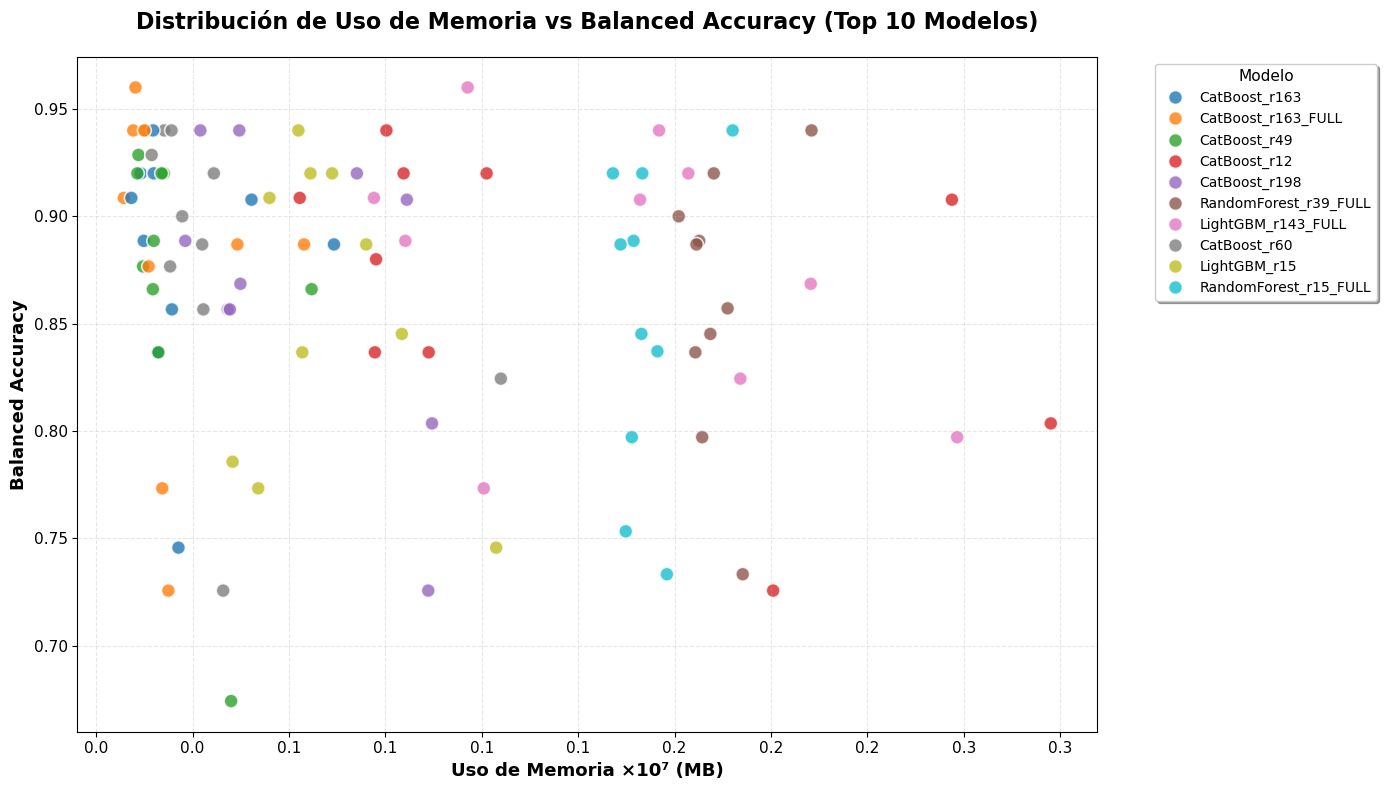

In [11]:
# === 5. BALANCED ACCURACY VS USO DE MEMORIA ===
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_top, x='memory_size', y='balanced_accuracy', hue='model',
               s=100, alpha=0.8, edgecolors='white', linewidth=1.2)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e7:.1f}'))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=12, prune='both'))
plt.xlabel('Uso de Memoria ×10⁷ (MB)', fontsize=13, fontweight='bold')
plt.ylabel('Balanced Accuracy', fontsize=13, fontweight='bold')
plt.title('Distribución de Uso de Memoria vs Balanced Accuracy (Top 10 Modelos)',
         fontsize=16, fontweight='bold', pad=20)
plt.grid(axis='both', alpha=0.3, linestyle='--', linewidth=0.8)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10,
          title='Modelo', title_fontsize=11, frameon=True,
          fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

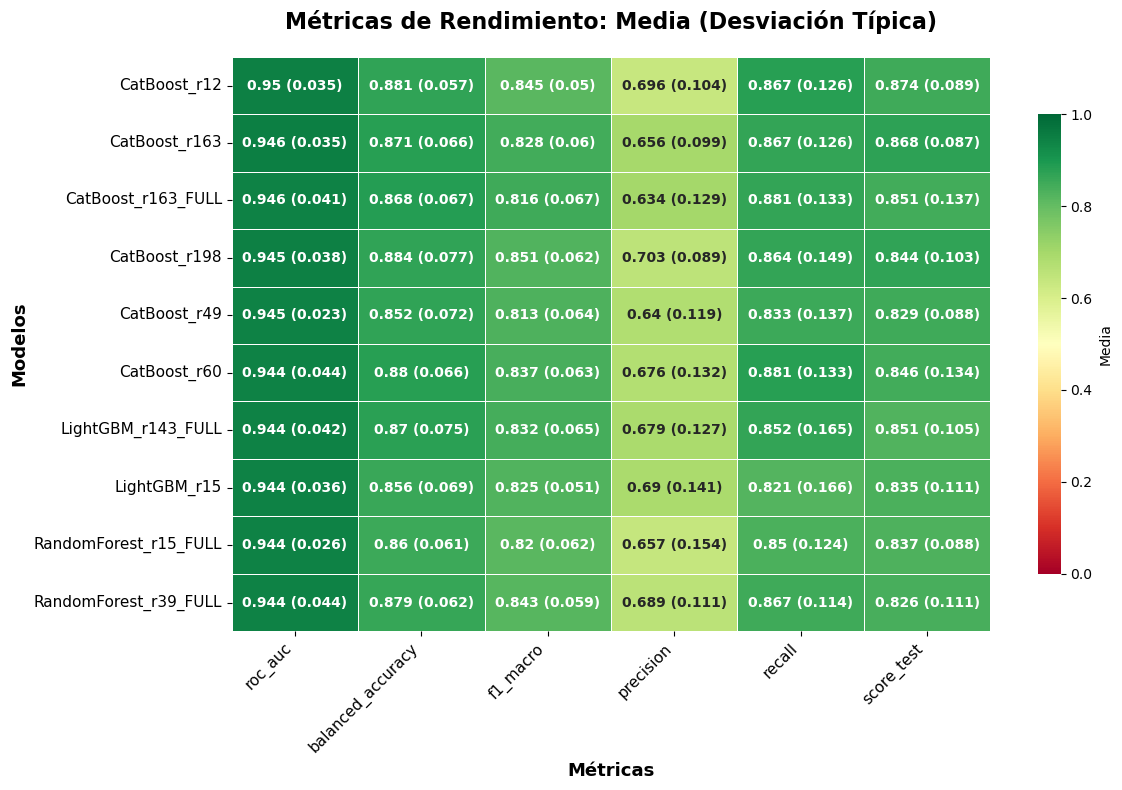

In [12]:
# === HEATMAP DE MÉTRICAS: MEDIA (DESVIACIÓN TÍPICA) ===
metricas = ['roc_auc', 'balanced_accuracy', 'f1_macro', 'precision', 'recall', 'score_test']
grouped = df_top.groupby('model')[metricas]

media = grouped.mean()
std = grouped.std()

# Formatear como "media (std)"
df_format = media.round(3).astype(str) + ' (' + std.round(3).astype(str) + ')'

# Ordenar por alguna métrica, por ejemplo roc_auc
df_format = df_format.loc[media.sort_values(by='roc_auc', ascending=False).index]

plt.figure(figsize=(12, 8))
sns.heatmap(media, annot=df_format, fmt="", cmap="RdYlGn", vmin=0, vmax=1,
            linewidths=0.5, linecolor='white', cbar_kws={'label': 'Media', 'shrink': 0.8},
            annot_kws={'fontsize': 10, 'fontweight': 'bold'})

plt.title('Métricas de Rendimiento: Media (Desviación Típica)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Métricas', fontsize=13, fontweight='bold')
plt.ylabel('Modelos', fontsize=13, fontweight='bold')
plt.xticks(fontsize=11, rotation=45, ha='right')
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()